In [5]:
import numpy as np
from numpy import mean
from numpy import std
from numpy import dstack

import seaborn as sns

from pandas import read_csv
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn import metrics as sklearn_metrics
from sklearn.metrics import classification_report

from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dropout, LSTM, Dense, Flatten, TimeDistributed

from tensorflow.keras.utils import to_categorical
from tensorflow.keras import metrics
from keras.layers import Permute, Reshape

Directory = ''

**DATA EXPLORATION**

In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [7]:
features = list()

# Open the 'UCI HAR Dataset/features.txt' file and read the feature names
with open(Directory + 'UCI HAR Dataset/features.txt') as feat:
    features = [l.split()[1] for l in feat.readlines()]

# Print the total number of features
print("Number of features = {}".format(len(features)))

# Print the feature names in a single line separated by '|'
for f in features:
    print(f, end=" | ")

Number of features = 561
tBodyAcc-mean()-X | tBodyAcc-mean()-Y | tBodyAcc-mean()-Z | tBodyAcc-std()-X | tBodyAcc-std()-Y | tBodyAcc-std()-Z | tBodyAcc-mad()-X | tBodyAcc-mad()-Y | tBodyAcc-mad()-Z | tBodyAcc-max()-X | tBodyAcc-max()-Y | tBodyAcc-max()-Z | tBodyAcc-min()-X | tBodyAcc-min()-Y | tBodyAcc-min()-Z | tBodyAcc-sma() | tBodyAcc-energy()-X | tBodyAcc-energy()-Y | tBodyAcc-energy()-Z | tBodyAcc-iqr()-X | tBodyAcc-iqr()-Y | tBodyAcc-iqr()-Z | tBodyAcc-entropy()-X | tBodyAcc-entropy()-Y | tBodyAcc-entropy()-Z | tBodyAcc-arCoeff()-X,1 | tBodyAcc-arCoeff()-X,2 | tBodyAcc-arCoeff()-X,3 | tBodyAcc-arCoeff()-X,4 | tBodyAcc-arCoeff()-Y,1 | tBodyAcc-arCoeff()-Y,2 | tBodyAcc-arCoeff()-Y,3 | tBodyAcc-arCoeff()-Y,4 | tBodyAcc-arCoeff()-Z,1 | tBodyAcc-arCoeff()-Z,2 | tBodyAcc-arCoeff()-Z,3 | tBodyAcc-arCoeff()-Z,4 | tBodyAcc-correlation()-X,Y | tBodyAcc-correlation()-X,Z | tBodyAcc-correlation()-Y,Z | tGravityAcc-mean()-X | tGravityAcc-mean()-Y | tGravityAcc-mean()-Z | tGravityAcc-std()-X | 

**Exploring Train Data**

In [8]:
# Read the features from the 'UCI HAR Dataset/test' folder
test = pd.DataFrame()

# Read the 'subject' data from 'UCI HAR Dataset/train/subject_test.txt' file and add it as a new column
test['subject'] = pd.read_csv(Directory + 'UCI HAR Dataset/test/subject_test.txt', header=None).squeeze('columns')

# Read the 'Activity' data from 'UCI HAR Dataset/train/y_test.txt' file and add it as a new column
test['Activity'] = pd.read_csv(Directory + 'UCI HAR Dataset/test/y_test.txt', names=['Activity']).squeeze('columns')

# Map the numerical activity codes to their corresponding names and add a new column
test['ActivityName'] = test['Activity'].map({1: 'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING', 6:'LAYING'})

# Display 5 random sample row from the DataFrame
test.sample(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
1545,0.271195,-0.017620,-0.119224,-0.994168,-0.976032,-0.967811,-0.994305,-0.973950,-0.960754,-0.937699,...,0.054999,-0.093318,0.027912,-0.685712,-0.662933,0.248234,0.200788,13,5,STANDING
953,0.279213,-0.018079,-0.106497,-0.995238,-0.982967,-0.980523,-0.995519,-0.984002,-0.980608,-0.938554,...,-0.186888,-0.088924,0.055217,-0.175459,-0.680726,-0.108238,-0.070466,10,4,SITTING
1899,0.277613,-0.014203,-0.112788,-0.997051,-0.987599,-0.994427,-0.997552,-0.986222,-0.993328,-0.941003,...,-0.066918,-0.274611,0.311237,-0.185298,-0.522098,-0.181808,-0.160423,18,4,SITTING
1633,0.332479,-0.035593,-0.118305,-0.403877,0.055913,-0.144360,-0.420606,0.050738,-0.176092,-0.361276,...,-0.718023,0.580954,-0.300004,-0.088152,-0.620821,0.268670,0.221043,13,1,WALKING
1969,0.303187,-0.019500,-0.069769,-0.322134,-0.142843,-0.529444,-0.352570,-0.194122,-0.510310,0.010701,...,-0.308572,-0.280620,0.434687,-0.909993,-0.763550,0.249114,-0.046498,18,1,WALKING


In [9]:
# Read the features from the 'UCI HAR Dataset/train' folder
train = pd.DataFrame()

# Read the 'subject' data from 'UCI HAR Dataset/train/subject_train.txt' file and add it as a new column
train['subject'] = pd.read_csv(Directory + 'UCI HAR Dataset/train/subject_train.txt', header=None).squeeze('columns')

# Read the 'Activity' data from 'UCI HAR Dataset/train/y_train.txt' file and add it as a new column
train['Activity'] = pd.read_csv(Directory + 'UCI HAR Dataset/train/y_train.txt', names=['Activity']).squeeze('columns')

# Map the numerical activity codes to their corresponding names and add a new column
train['ActivityName'] = train['Activity'].map({1: 'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING', 6:'LAYING'})

# Display 5 random sample row from the DataFrame
train.sample(5)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
6238,0.309738,-0.020493,-0.154213,-0.320199,0.012908,-0.111974,-0.372424,0.033822,-0.073227,0.043239,...,-0.571496,0.723541,-0.975177,0.792634,-0.465034,0.246483,0.364796,27,2,WALKING_UPSTAIRS
100,0.290971,-0.027810,-0.042983,-0.139370,0.038038,-0.266841,-0.172151,0.005201,-0.259049,0.022737,...,-0.084550,-0.497419,0.162353,-0.408397,-0.750739,0.268019,0.046983,1,1,WALKING
3517,0.269275,-0.019136,-0.101755,-0.993278,-0.984101,-0.971503,-0.994503,-0.982640,-0.971131,-0.939243,...,-0.020990,-0.162524,-0.538984,-0.743303,0.403104,-0.540770,-0.438698,17,6,LAYING
3697,0.271601,-0.015955,-0.108100,-0.994341,-0.985979,-0.992858,-0.994180,-0.987164,-0.992289,-0.942469,...,-0.254194,0.407265,-0.268799,-0.307854,0.590943,-0.575482,-0.428694,19,6,LAYING
4304,0.249219,-0.002040,-0.086883,-0.318311,0.131060,-0.107396,-0.352146,0.107747,-0.148505,-0.198316,...,0.585561,0.601304,0.943545,-0.679441,-0.590972,0.330914,0.178519,21,1,WALKING


**Checking for Duplicates and Nulls**

In [12]:
# Checking for duplicates in the train dataset
print('Duplicates in train = {}'.format(sum(train.duplicated())))

# Checking for duplicates in the test dataset
print('Duplicates in test = {}'.format(sum(test.duplicated())))

# Checking for invalid (null) values in the train dataset
print('Invalid values in train = {}'.format(train.isnull().values.sum()))

# Checking for invalid (null) values in the test dataset
print('Invalid values in test = {}'.format(test.isnull().values.sum()))

Duplicates in train = 0
Duplicates in test = 0
Invalid values in train = 0
Invalid values in test = 0


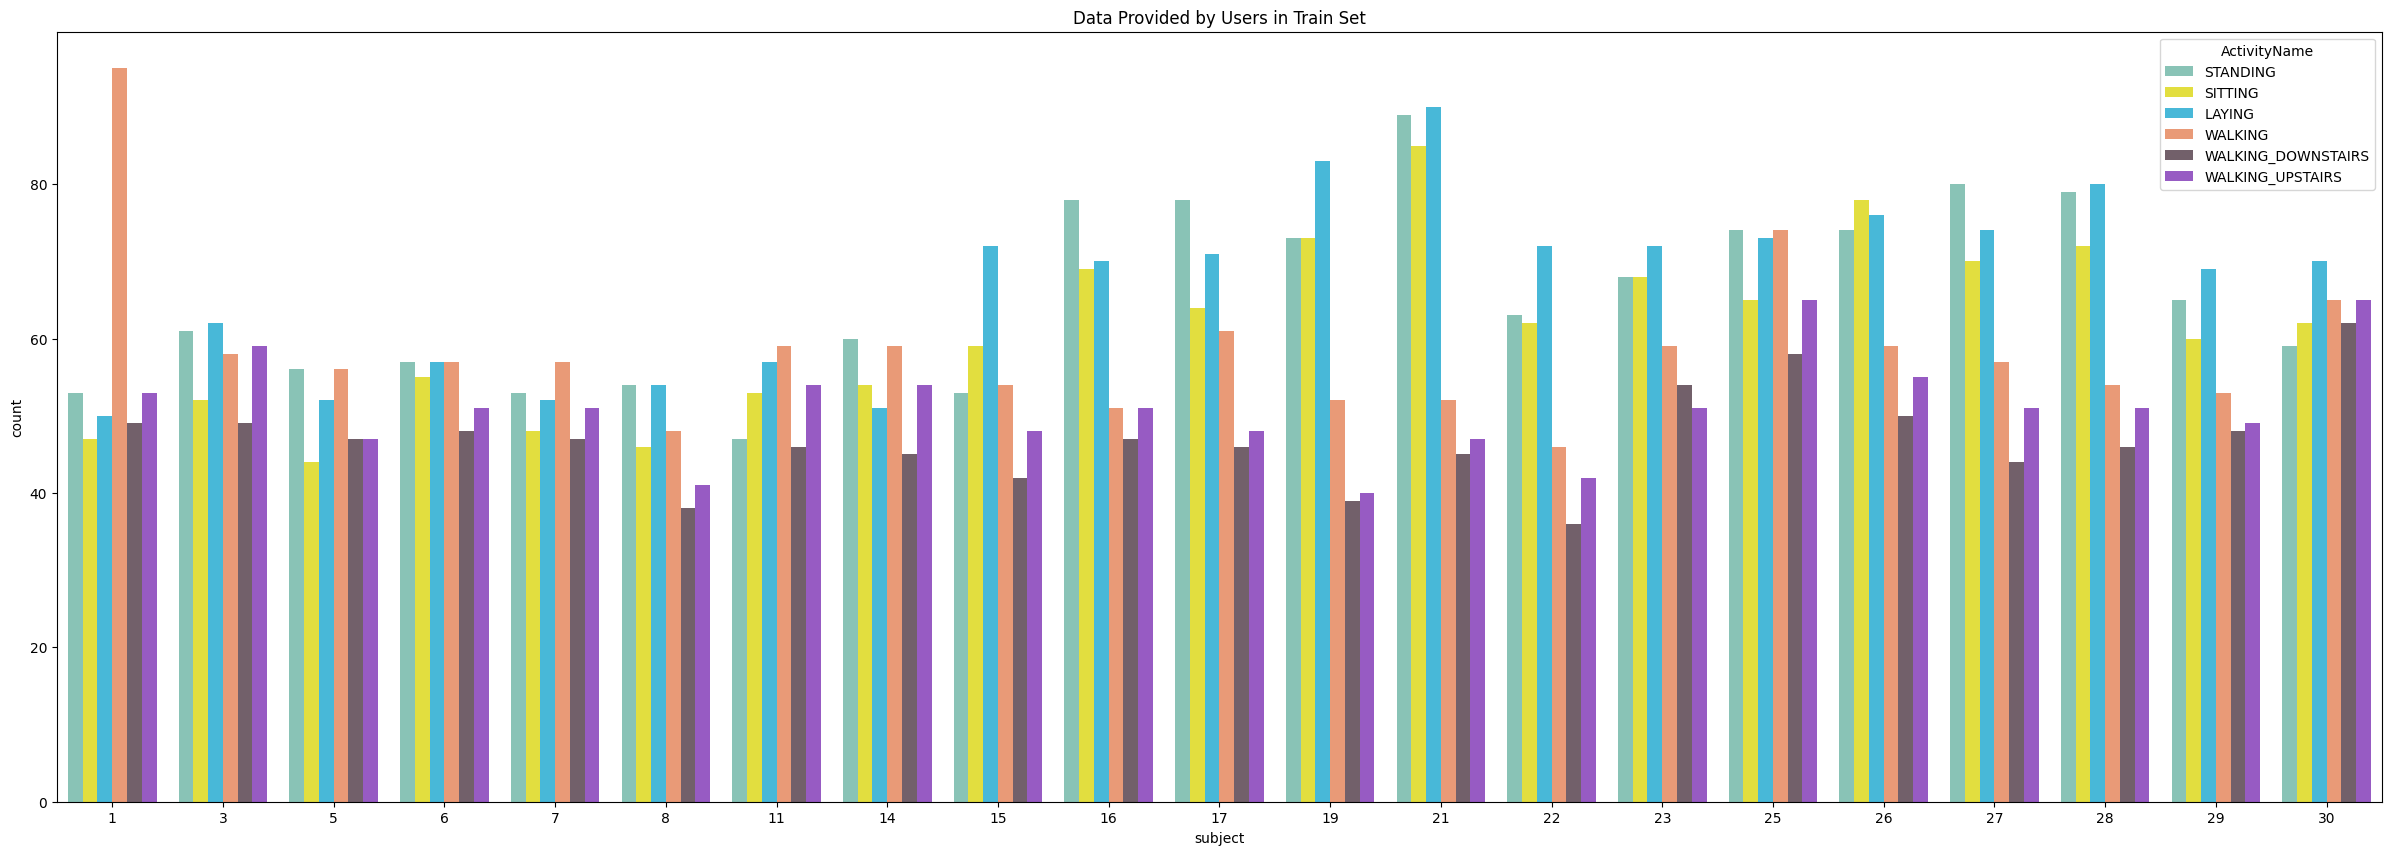

In [13]:
 # Setting the figure size
pyplot.figure(figsize=(30, 10))

# Creating a count plot
sns.countplot(x='subject', hue='ActivityName', palette=["#7fcdbb", "#fdf824", "#30c6f0", "#fc9264", "#755d6b", "#9a4ad4"], data=train)

# Adding a title to the plot
pyplot.title('Data Provided by Users in Train Set')

# Displaying the plot
pyplot.show()


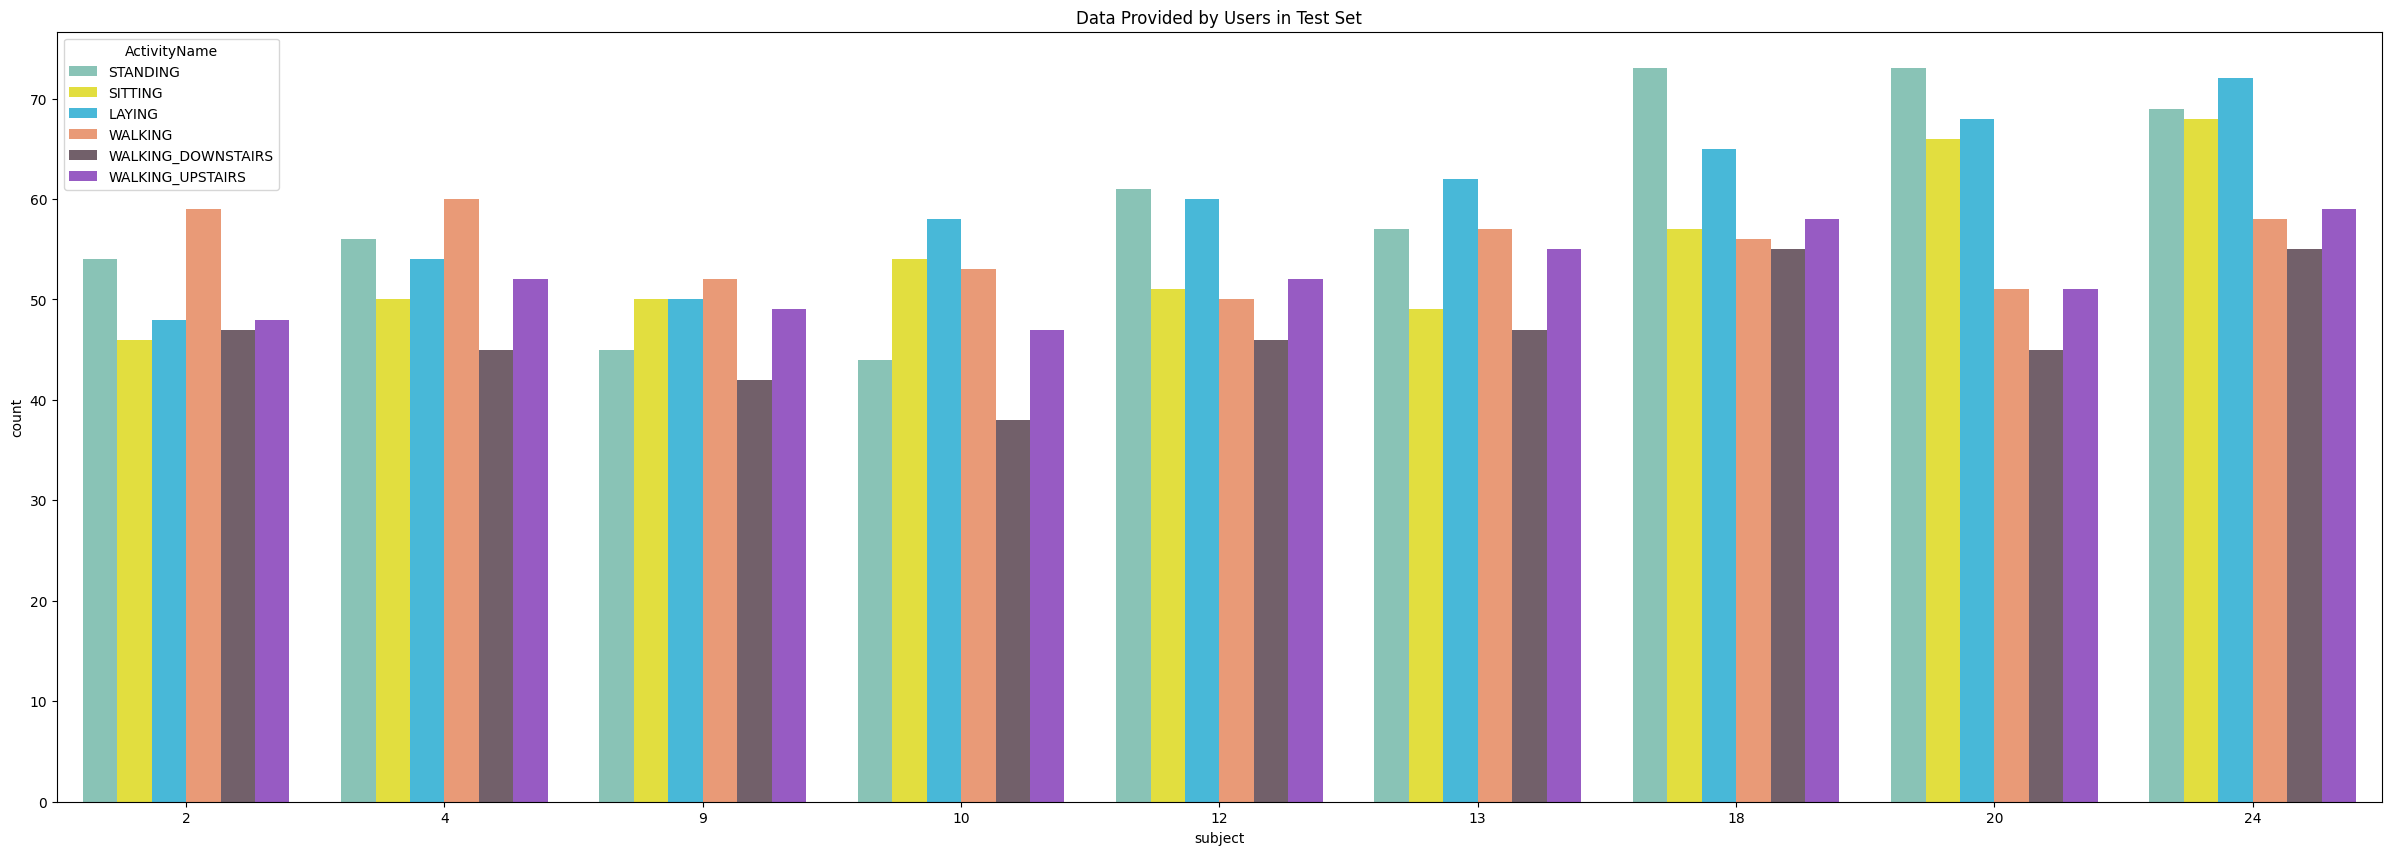

In [14]:
# Setting the figure size
pyplot.figure(figsize=(30, 10))

# Creating a count plot
sns.countplot(x='subject', hue='ActivityName', palette=["#7fcdbb", "#fdf824", "#30c6f0", "#fc9264", "#755d6b", "#9a4ad4"], data=test)

# Adding a title to the plot
pyplot.title('Data Provided by Users in Test Set')

# Displaying the plot
pyplot.show()

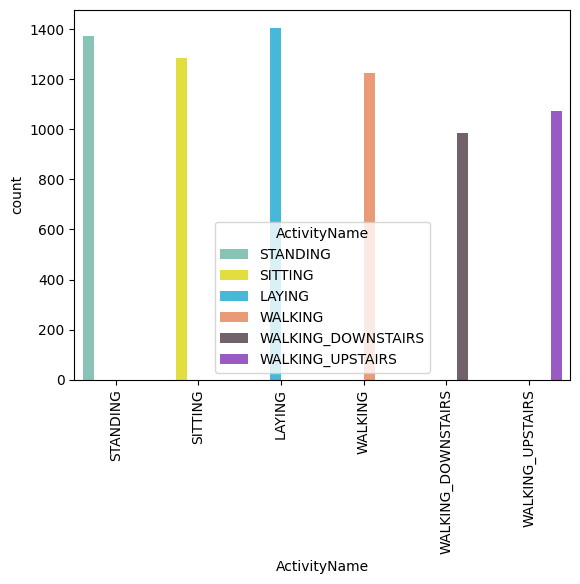

In [15]:
sns.countplot(x="ActivityName",
               hue='ActivityName',
               palette=["#7fcdbb", "#fdf824", "#30c6f0", "#fc9264", "#755d6b", "#9a4ad4"],
               data=train)
pyplot.xticks(rotation=90)
pyplot.show()

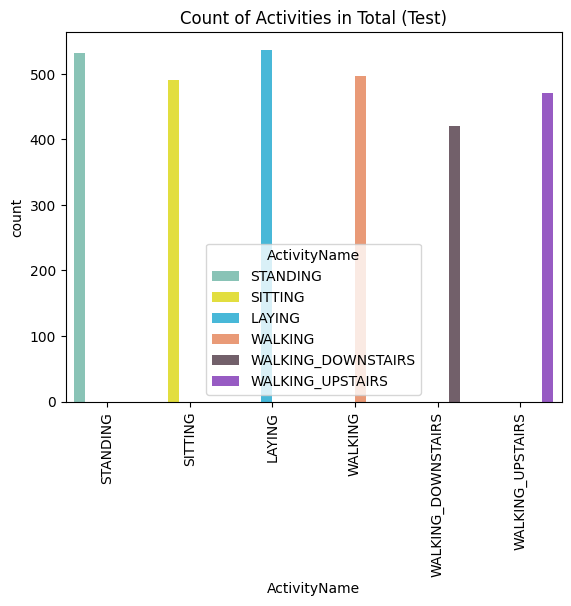

In [16]:
pyplot.title('Count of Activities in Total (Test)')
sns.countplot(x="ActivityName",
               hue='ActivityName',
               palette=["#7fcdbb", "#fdf824", "#30c6f0", "#fc9264", "#755d6b", "#9a4ad4"],
               data=test)
pyplot.xticks(rotation=90)
pyplot.show()

**CNN-LSTM Model**

In [17]:
def file_load(filepath):
    # Load the file into a DataFrame using read_csv
    df = read_csv(filepath, header=None, delim_whitespace=True)

    # Return the values of the DataFrame
    return df.values

In [18]:
def train_test_append(filenames, append_before=''):
    # Initialize an empty list to store the loaded data
    datalist = list()

    # Iterate through each filename in the provided list
    for name in filenames:
        # Load the file using the file_load function
        data = file_load(append_before + name)

        # Append the loaded data to the list
        datalist.append(data)

    # Stack the data along the third axis (axis=2)
    datalist = dstack(datalist)

    # Return the stacked data
    return datalist

In [19]:
def inertial_signals_load(group, append_before=''):
    # Construct the file path for the Inertial Signals directory
    filepath = append_before + group + '/Inertial Signals/'

    # List of filenames for different signals
    filenames = list()
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']

    # Load the inertial signals data using the train_test_append function
    X = train_test_append(filenames, filepath)

    # Load the corresponding activity labels (y) using the file_load function
    y = file_load(append_before + group + '/y_'+group+'.txt')

    # Return the loaded inertial signals data (X) and activity labels (y)
    return X, y

In [20]:
def load_dataset(append_before=''):
    # Load training set inertial signals and labels
    trainX, trainy = inertial_signals_load('train', append_before + 'UCI HAR Dataset/')

    # Load testing set inertial signals and labels
    testX, testy = inertial_signals_load('test', append_before + 'UCI HAR Dataset/')

    # Adjust labels to start from 0
    trainy = trainy - 1
    testy = testy - 1

    # Convert labels to one-hot encoded format
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)

    # Print shapes of the loaded data
    print("X Train shape:", trainX.shape)
    print("Y Train Shape:", trainy.shape)
    print("X Test  shape:", testX.shape)
    print("Y Test  shape:", testy.shape)

    # Return the loaded data and labels
    return trainX, trainy, testX, testy


In [21]:
trainX, trainy, testX, testy = load_dataset(Directory)

train_subjects = pd.read_csv(Directory + 'UCI HAR Dataset/train/subject_train.txt', header=None).squeeze('columns')
test_subjects = pd.read_csv(Directory + 'UCI HAR Dataset/test/subject_test.txt', header=None).squeeze('columns')


# Concatenate along axis 0 (assuming you want to concatenate along the first dimension)
X_combined = np.concatenate((trainX, testX), axis=0)
Y_combined = np.concatenate((trainy, testy), axis=0)
Subject_combined = np.concatenate((train_subjects, test_subjects), axis=0)



# Print the shapes of the concatenated arrays
print("\nX Combined shape:", X_combined.shape)
print("Y Combined shape:", Y_combined.shape)
print("Subject Combined shape:", Subject_combined.shape)


# Calculate the number of samples for the test set
test_size = 0.1
test_samples = int(len(X_combined) * test_size)

# Perform the initial time-based train-test split
trainX, testX = X_combined[:-test_samples], X_combined[-test_samples:]
trainy, testy = Y_combined[:-test_samples], Y_combined[-test_samples:]
trainSub, testSub = Subject_combined[:-test_samples], Subject_combined[-test_samples:]

# OW/NOW => comment for OW
trainX = np.take(trainX, indices=np.arange(64), axis=1)
testX = np.take(testX, indices=np.arange(64), axis=1)

# Print the shapes of the reshaped data
print("\nX Train  shape and type:"      , trainX.shape  ,type(trainX    ))
print("X Test     shape and type:"      , testX.shape   ,type(testX     ))
print("Y Train    shape and type:"      , trainy.shape  ,type(trainy    ))
print("Y Test     shape and type:"      , testy.shape   ,type(testy     ))
print("sub Train  shape and type:"      , trainSub.shape,type(testy     ))
print("sub Test   shape and type:"      , testSub.shape ,type(testy     ))

X Train shape: (7352, 128, 9)
Y Train Shape: (7352, 6)
X Test  shape: (2947, 128, 9)
Y Test  shape: (2947, 6)

X Combined shape: (10299, 128, 9)
Y Combined shape: (10299, 6)
Subject Combined shape: (10299,)

X Train  shape and type: (9270, 64, 9) <class 'numpy.ndarray'>
X Test     shape and type: (1029, 64, 9) <class 'numpy.ndarray'>
Y Train    shape and type: (9270, 6) <class 'numpy.ndarray'>
Y Test     shape and type: (1029, 6) <class 'numpy.ndarray'>
sub Train  shape and type: (9270,) <class 'numpy.ndarray'>
sub Test   shape and type: (1029,) <class 'numpy.ndarray'>


In [22]:
# Set parameters for the model
verbose, epochs, batch_size = 1, 182, 64
n_timesteps = trainX.shape[1]
n_features = trainX.shape[2]
n_outputs = trainy.shape[1]
n_steps = 1
n_length = 64

# Reshape the data for the CNN-LSTM model
trainX = trainX.reshape((trainX.shape[0], n_steps, n_length, n_features))
testX = testX.reshape((testX.shape[0], n_steps, n_length, n_features))

# Print the shapes of the reshaped data
print("Train  shape:", trainX.shape)
print("Test   shape:", testX.shape)


Train  shape: (9270, 1, 64, 9)
Test   shape: (1029, 1, 64, 9)


In [23]:
from sklearn.model_selection import KFold, TimeSeriesSplit,LeaveOneGroupOut

n_splits=10

kfold = KFold(n_splits=n_splits, shuffle=False)
tscv = TimeSeriesSplit(n_splits=n_splits)
loso = LeaveOneGroupOut()

In [24]:
for fold, (train_index, val_index) in enumerate(loso.split(trainX, trainy, groups=trainSub)):
    print(f"validation fold {fold}/{n_splits}", min(val_index),max(val_index), val_index.shape)
print("\n\n")
for fold, (train_index, val_index) in enumerate(loso.split(trainX, trainy, groups=trainSub)):
    print(f"Train fold {fold}/{n_splits}", min(train_index),max(train_index), train_index.shape)

validation fold 0/10 0 346 (347,)
validation fold 1/10 7352 7653 (302,)
validation fold 2/10 347 687 (341,)
validation fold 3/10 7654 7970 (317,)
validation fold 4/10 688 989 (302,)
validation fold 5/10 990 1314 (325,)
validation fold 6/10 1315 1622 (308,)
validation fold 7/10 1623 1903 (281,)
validation fold 8/10 7971 8258 (288,)
validation fold 9/10 8259 8552 (294,)
validation fold 10/10 1904 2219 (316,)
validation fold 11/10 8553 8872 (320,)
validation fold 12/10 8873 9199 (327,)
validation fold 13/10 2220 2542 (323,)
validation fold 14/10 2543 2870 (328,)
validation fold 15/10 2871 3236 (366,)
validation fold 16/10 3237 3604 (368,)
validation fold 17/10 9200 9269 (70,)
validation fold 18/10 3605 3964 (360,)
validation fold 19/10 3965 4372 (408,)
validation fold 20/10 4373 4693 (321,)
validation fold 21/10 4694 5065 (372,)
validation fold 22/10 5066 5474 (409,)
validation fold 23/10 5475 5866 (392,)
validation fold 24/10 5867 6242 (376,)
validation fold 25/10 6243 6624 (382,)
valida

In [25]:
for fold, (train_index, val_index) in enumerate(tscv.split(trainX)):
    print(f"validation fold {fold}/{n_splits}", min(val_index),max(val_index), val_index.shape)

for fold, (train_index, val_index) in enumerate(tscv.split(trainX)):
    print(f"Train fold {fold}/{n_splits}", min(train_index),max(train_index), train_index.shape)

validation fold 0/10 850 1691 (842,)
validation fold 1/10 1692 2533 (842,)
validation fold 2/10 2534 3375 (842,)
validation fold 3/10 3376 4217 (842,)
validation fold 4/10 4218 5059 (842,)
validation fold 5/10 5060 5901 (842,)
validation fold 6/10 5902 6743 (842,)
validation fold 7/10 6744 7585 (842,)
validation fold 8/10 7586 8427 (842,)
validation fold 9/10 8428 9269 (842,)
Train fold 0/10 0 849 (850,)
Train fold 1/10 0 1691 (1692,)
Train fold 2/10 0 2533 (2534,)
Train fold 3/10 0 3375 (3376,)
Train fold 4/10 0 4217 (4218,)
Train fold 5/10 0 5059 (5060,)
Train fold 6/10 0 5901 (5902,)
Train fold 7/10 0 6743 (6744,)
Train fold 8/10 0 7585 (7586,)
Train fold 9/10 0 8427 (8428,)


In [26]:
# Create an empty list to store Accuracies for each fold
fold_accuracies=[]

# Create an empty list to store confusion matrices for each fold
fold_confusion_matrices = []
#Labels for Confusion marix
LABELS = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING']

for fold, (train_index, val_index) in enumerate(loso.split(trainX, trainy, groups=trainSub)):
    print(f'\nFold {fold + 1}/{n_splits}:')

    # Split the data into training and validation sets for this fold (valid size = 10% of trian)
    X_train, X_val = trainX[train_index], trainX[val_index]
    y_train, y_val = trainy[train_index], trainy[val_index]

    #############################################################################################
    model = Sequential()

    # Convolutional layer 1
    model.add(TimeDistributed(Conv1D(kernel_size=3, filters=507, activation='relu'), input_shape=(None, n_length, n_features)))

    # MaxPool and DropOut
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Dropout(0.00952)))

    # Convolutional layer 2
    model.add(TimeDistributed(Conv1D(kernel_size=3, filters=111, activation='relu')))

    # MaxPool and DropOut
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Dropout(0.00952)))

    # Convolutional layer 3
    model.add(TimeDistributed(Conv1D(kernel_size=3, filters=468, activation='relu')))

    # MaxPool and DropOut
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Dropout(0.00952)))

    # Convolutional layer 4
    model.add(TimeDistributed(Conv1D(kernel_size=3, filters=509, activation='relu')))

    # MaxPool and DropOut
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Dropout(0.00952)))

    # Flatten layer with time distribution
    model.add(TimeDistributed(Flatten()))

    # LSTM layer
    model.add(LSTM(127))

    model.add(Dropout(0.27907))

    # Dense (fully connected) layer with ReLU activation
    model.add(Dense(772, activation='relu'))

    # Output layer with softmax activation (for multi-class classification)
    model.add(Dense(n_outputs, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Display the model summary
    model.summary()

    #############################################################################################

    # Train the model on the current fold
    history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size, verbose=verbose)
    # history=model.fit(X_train, y_train, validation_data=(testX, testy), epochs=epochs, batch_size=batch_size, verbose=verbose)

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(testX, testy, verbose=verbose)
    print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')
    # Append the accuracy to the list
    fold_accuracies.append(test_acc)

    # Make predictions on the test set
    y_pred = model.predict(testX)
    max_y_pred = np.argmax(y_pred, axis=1)
    max_y_test = np.argmax(testy, axis=1)

    # Calculate confusion matrix for this fold
    fold_confusion_matrix = sklearn_metrics.confusion_matrix(max_y_test, max_y_pred)

    # Append the confusion matrix to the list
    fold_confusion_matrices.append(fold_confusion_matrix)

    # Visualize the confusion matrix for this fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(fold_confusion_matrix, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
    plt.title(f'Confusion Matrix - Fold {fold + 1}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    clr = sklearn_metrics.classification_report(max_y_test, max_y_pred)
    print(clr)

Output hidden; open in https://colab.research.google.com to view.

In [27]:
# Calculate and print the average accuracy

for i in range(n_splits):
    print(f'fold {i+1}/{n_splits} Accuracy = {fold_accuracies[i] * 1:.4f}')

print(f'\nHighst Accuracy: {np.max(fold_accuracies) * 1:.4f}')
print(f'Lowest Accuracy: {np.min(fold_accuracies) * 1:.4f}')
print(f'\nFinal Average Accuracy: {np.mean(fold_accuracies) * 1:.4f} ± {np.std(fold_accuracies) * 1:.4f}')

fold 1/10 Accuracy = 0.9942
fold 2/10 Accuracy = 0.9679
fold 3/10 Accuracy = 0.9747
fold 4/10 Accuracy = 0.9883
fold 5/10 Accuracy = 0.9718
fold 6/10 Accuracy = 0.9913
fold 7/10 Accuracy = 0.9845
fold 8/10 Accuracy = 0.9874
fold 9/10 Accuracy = 0.9883
fold 10/10 Accuracy = 0.9922

Highst Accuracy: 0.9942
Lowest Accuracy: 0.9670

Final Average Accuracy: 0.9835 ± 0.0076
